In [2]:
import pandas as pd

df = pd.read_excel("Concrete_Data.xls")

new_col = []
for col in df.columns:
    new_col.append(col.split(" (")[0].replace(" ", ""))
    
df.columns = new_col

df.sort_values(by="Concretecompressivestrength", ascending=False).head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Concretecompressivestrength
181,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.599225
381,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.751169
153,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.199848
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
159,389.9,189.0,0.0,145.9,22.0,944.7,755.8,56,79.400056


In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df.drop(["Concretecompressivestrength"], axis=1)
y = df["Concretecompressivestrength"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [117]:
# fit model no training data
model = RandomForestRegressor(n_estimators = 90, random_state=42, max_depth = 20, min_samples_split=2)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=90, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [112]:
from xgboost import XGBRegressor
model = XGBRegressor(learning_rate=0.05, n_estimators=2000)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [118]:
model.score(X_test, y_test)

0.88456491910329127

In [114]:
model.feature_importances_

array([ 0.16415556,  0.09308196,  0.04906524,  0.13339119,  0.09323972,
        0.13023587,  0.12203202,  0.21479845], dtype=float32)

In [115]:
from evolutionary_search import maximize
import numpy as np

new_col

['Cement',
 'BlastFurnaceSlag',
 'FlyAsh',
 'Water',
 'Superplasticizer',
 'CoarseAggregate',
 'FineAggregate',
 'Age',
 'Concretecompressivestrength']

In [119]:
def eval_mix(Cement, BlastFurnaceSlag, FlyAsh, Water, 
         Superplasticizer, CoarseAggregate, FineAggregate, Age, model):
    
    x = np.asarray([Cement, BlastFurnaceSlag, FlyAsh, Water, 
         Superplasticizer, CoarseAggregate, FineAggregate, Age]).reshape(-1, 8)
    
    return model.predict(x)[0]


param_grid = {}

for col in X_train.columns:
    param_grid[col] = np.arange(int(df[col].min()), int(df[col].max()+20))

param_grid["Age"] = [28]
param_grid

{'Age': [28],
 'BlastFurnaceSlag': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170,

Extra parameters found on https://github.com/yama1968/Spikes/blob/8f41c86085b6714fed0ef6ef9195005cfa7bbbe7/mxnet/deap_lenet.ipynb

In [109]:
args = {"model": model}

best_params, best_score, score_results, hist, logs = maximize(eval_mix, param_grid, 
                                                              args, 
                                                              verbose=False,
                                                              population_size=100,
                                                              gene_mutation_prob=0.2,
                                                              gene_crossover_prob=0.7,
                                                              tournament_size=10,
                                                              generations_number=100)

/home/dexter/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/dexter/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


ValueError: feature_names mismatch: ['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer', 'CoarseAggregate', 'FineAggregate', 'Age'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']
expected FlyAsh, BlastFurnaceSlag, Cement, Age, CoarseAggregate, FineAggregate, Superplasticizer, Water in input data
training data did not have the following fields: f1, f4, f6, f0, f3, f5, f7, f2

In [79]:
best_score

71.232063813333312

In [80]:
best_params

{'Age': 28,
 'BlastFurnaceSlag': 182,
 'Cement': 412,
 'CoarseAggregate': 954,
 'FineAggregate': 741,
 'FlyAsh': 15,
 'Superplasticizer': 23,
 'Water': 145}

In [95]:
top_params = list(best_params.values())[:-1]
top_params

ages = []
cpa = []

for i in range(280):
    ages.append(i)
    cpa.append(model.predict(top_params + [i])[0])

/home/dexter/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/dexter/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/dexter/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single s

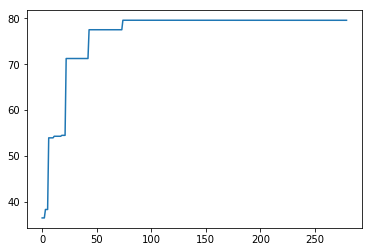

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(ages, cpa)
plt.show()